In [ ]:
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/Boston.csv

--2022-03-01 02:03:40--  https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/Boston.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37658 (37K) [text/plain]
Saving to: ‘Boston.csv’

Boston.csv          100%[===================>]  36.78K  --.-KB/s    in 0.003s  

2022-03-01 02:03:40 (10.9 MB/s) - ‘Boston.csv’ saved [37658/37658]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Data Cleaning
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


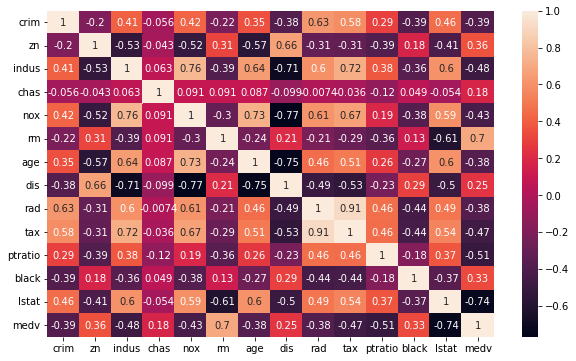

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

# Split the Dataset into 2 parts

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=["medv"])
y = df["medv"]

In [ ]:
X.shape

(506, 13)

In [ ]:
y.shape

(506,)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

In [ ]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [ ]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44
377,9.82349,0.0,18.10,0,0.671,6.794,98.8,1.3580,24,666,20.2,396.90,21.24
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12


# Linear Regression

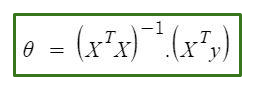

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_train.shape

(354, 13)

In [ ]:
# theta_0,theta_1,theta_2,theta_3,...theta_13
lr.intercept_ # theta_0

46.39649387182328

In [ ]:
lr.coef_ # theta_1, theta_2, ... theta_13

array([-9.85424717e-02,  6.07841138e-02,  5.91715401e-02,  2.43955988e+00,
       -2.14699650e+01,  2.79581385e+00,  3.57459778e-03, -1.51627218e+00,
        3.07541745e-01, -1.12800166e-02, -1.00546640e+00,  6.45018446e-03,
       -5.68834539e-01])

In [ ]:
result = lr.predict(X_test)
result # predicted output

array([32.3914647 , 27.94401279, 17.83762764, 21.66941388, 18.93639614,
       20.01995795, 32.63414961, 17.86179976, 24.73211676, 26.77346826,
       27.26138023, 28.63243014, 21.16103038, 27.15098589, 23.33198614,
       21.02894005, 17.11819755, 37.52455938, 30.69864427,  8.46104486,
       20.83966032, 16.26732451, 25.05030307, 24.8069032 , 31.6789299 ,
       10.98989363, 13.54111562, 16.54697099, 35.86699683, 14.69589266,
       21.05655107, 13.90301353, 43.01321262, 17.80335305, 21.68817023,
       20.45077825, 17.38095983, 26.81334904, 10.08706217, 19.96174586,
       24.1983249 , 21.00202622, 29.38682967, 16.33215467, 19.37439646,
       14.45525235, 39.52670798, 18.18535021, 26.38536303, 20.41420863,
       25.08511581, 24.40208165, 24.87902769, 26.97887956,  4.93921657,
       24.0001365 , 10.66711602, 26.98494775, 16.63507993, 35.31652989,
       19.49249915, 27.37577863, 16.53965715, 19.09746715, 11.06765336,
       32.03445261, 36.15847648, 21.53547868, 24.96434626, 25.50

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test,result) 

3.344665503598753

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mean_squared_error(y_test,result) # This is preferred for Regression

19.831323672062922

## R2 Score:
In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variation in the dependent variable (Output) that is predictable from the independent variable(s) (Inputs)

In [ ]:
r2_score(y_test,result) # Power of features in predicting the target

0.7836295385076315